<a href="https://colab.research.google.com/github/raiyanimam/Delhi-Metro-Network-Analysis/blob/main/Delhi_Metro_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the Metro Network Analysis using python

*   using libs - pandas, folium , matplotlib
*   what kind of Analysis are done in this

    →Distance Analysis:

Distribution of distances from the start for different lines.

Distribution of station opening dates.
Number of stations opened each year.
Geospatial Analysis:

Heatmap of station densities.
Clustering of stations based on their geographical coordinates.
Line Analysis:

Number of stations per line.
Average distance between stations on each line.
Correlation Analysis:

Correlation between distance from the start and other features like latitude and longitude.






In [14]:
import pandas as pd
import folium

metro_data = pd.read_csv('/content/Delhi-Metro-Network.csv')
metro_data.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [15]:
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

delhi_map = folium.Map(location=[28.7041, 77.1025], zoom_start=10)

# adding colored markers for each metro station with line name in tooltip
for index, row in metro_data.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color)
    ).add_to(delhi_map)

# Display the map
delhi_map

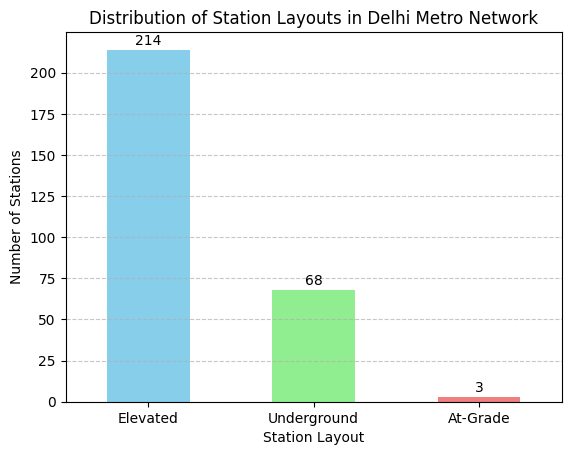

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Delhi-Metro-Network.csv')

# Identify the unique types of station layouts and their frequencies
station_layout_counts = data['Station Layout'].value_counts()

# Create a bar chart for station layout distribution
station_layout_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])

# Add titles and labels
plt.title('Distribution of Station Layouts in Delhi Metro Network')
plt.xlabel('Station Layout')
plt.ylabel('Number of Stations')

# Add data labels
for i, value in enumerate(station_layout_counts):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

# Display the bar chart
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Delhi-Metro-Network.csv')

stations_per_line = metro_data['Line'].value_counts()


total_distance_per_line = metro_data.groupby('Line')['Distance from Start (km)'].max()

avg_distance_per_line = total_distance_per_line / (stations_per_line - 1)

line_analysis = pd.DataFrame({
    'Line': stations_per_line.index,
    'Number of Stations': stations_per_line.values,
    'Average Distance Between Stations (km)': avg_distance_per_line
})

line_analysis = line_analysis.sort_values(by='Average Distance Between Stations (km)', ascending=False)
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)

line_analysis.reset_index(drop=True, inplace=True)
print(line_analysis)

                 Line  Number of Stations  \
0           Blue line                  49   
1           Pink line                  38   
2         Yellow line                  37   
3         Voilet line                  34   
4            Red line                  29   
5        Magenta line                  25   
6          Green line                  21   
7           Aqua line                  21   
8         Rapid Metro                  11   
9    Blue line branch                   8   
10        Orange line                   6   
11          Gray line                   3   
12  Green line branch                   3   

    Average Distance Between Stations (km)  
0                                 1.355000  
1                                 1.097917  
2                                 1.157143  
3                                 1.950000  
4                                 1.240000  
5                                 1.050000  
6                                 4.160000  
7        

In [34]:
# Creating subplots (visualized the line analysis)
plot = make_subplots(rows=1, cols=2, subplot_titles=('Number of Stations Per Metro Line',
                                                    'Average Distance Between Stations Per Metro Line'),
                    horizontal_spacing=0.1)

# plot for Number of Stations per Line
plot.add_trace(
    go.Bar(y=line_analysis['Line'], x=line_analysis['Number of Stations'],
           orientation='h', name='Number of Stations'),
    row=1, col=1
)

# plot for Average Distance Between Stations
plot.add_trace(
    go.Bar(y=line_analysis['Line'], x=line_analysis['Average Distance Between Stations (km)'],
           orientation='h', name='Average Distance (km)'),
    row=1, col=2
)
plot.update_layout(template='plotly_dark')

plot.show()
